In [2]:
import cv2
import matplotlib.pyplot as plt
from concurrent.futures import ThreadPoolExecutor
import time
import numpy as np

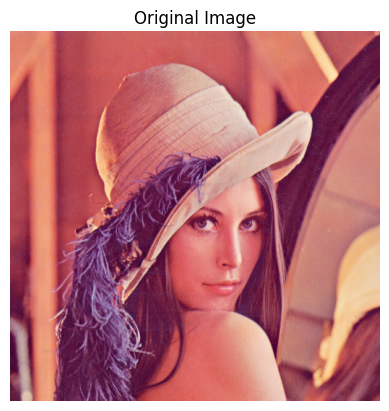

In [3]:
def load_image(filepath):
    image = cv2.imread(filepath)
    if image is None:
        raise FileNotFoundError("Image not found.")
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

def display_image(title, image):
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()

image = load_image('/content/lena.png')
display_image("Original Image", image)

In [4]:
# blurring
def blur_image(image):
    kernel = np.ones((5, 5), np.float32) / 25
    return cv2.filter2D(image, -1, kernel)

# sharpening
def sharpen_image(image):
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    return cv2.filter2D(image, -1, kernel)

# edge detection
def edge_detection(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
    edges = cv2.magnitude(sobelx, sobely)
    return cv2.convertScaleAbs(edges)

def parallelize(image, func):
    with ThreadPoolExecutor() as executor:
        result = executor.submit(func, image)
        return result.result()

def measure_time(func, image):
    start = time.time()
    result = func(image)
    end = time.time()
    return result, end - start

In [11]:
# no parallelization
blurred, blur_time = measure_time(blur_image, image)
sharpened, sharpen_time = measure_time(sharpen_image, image)
edges, edge_time = measure_time(edge_detection, image)

# parallelization
blurred_parallel, blur_time_parallel = measure_time(lambda img: parallelize(img, blur_image), image)
sharpened_parallel, sharpen_time_parallel = measure_time(lambda img: parallelize(img, sharpen_image), image)
edges_parallel, edge_time_parallel = measure_time(lambda img: parallelize(img, edge_detection), image)

print(f"Blur Time: {blur_time:.4f}s , Parallel: {blur_time_parallel:.4f}s")
print(f"Sharpen Time: {sharpen_time:.4f}s , Parallel: {sharpen_time_parallel:.4f}s")
print(f"Edge Detection Time: {edge_time:.4f}s , Parallel: {edge_time_parallel:.4f}s")

Blur Time: 0.0040s , Parallel: 0.0040s
Sharpen Time: 0.0012s , Parallel: 0.0016s
Edge Detection Time: 0.0034s , Parallel: 0.0043s


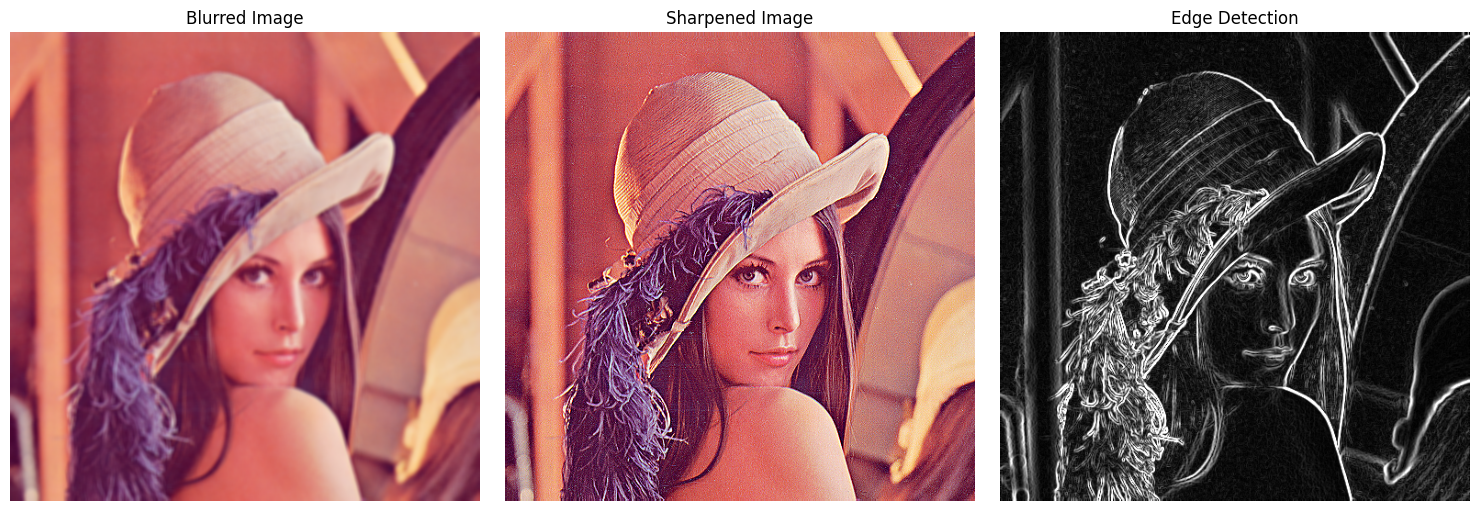

In [12]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

titles = ["Blurred Image", "Sharpened Image", "Edge Detection"]
images = [blurred_parallel, sharpened_parallel, edges_parallel]

for ax, img, title in zip(axes, images, titles):
    ax.imshow(img, cmap="gray")
    ax.set_title(title)
    ax.axis("off")

plt.tight_layout()
plt.show()
